<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>CNN on Handwritten Digits with Keras</H1></u></center>

In [1]:
import tensorflow.compat.v1 as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)
tf.compat.v1.keras.backend.set_session(
    sess
)

Using TensorFlow backend.


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1



In [2]:
import numpy as np
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.datasets import mnist


Bad key "text.kerning_factor" on line 4 in
D:\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Importing the data:

In [3]:
(X_train_, y_train_), (X_test_, y_test_) = mnist.load_data()

In [4]:
X_train_.shape

(60000, 28, 28)

In [5]:
y_train_.shape

(60000,)

In [6]:
# Reshape the training data to represent one-channel image input(grayscale)
img_rows, img_cols = X_train_[0].shape[0], X_train_[0].shape[1]
X_train = X_train_.reshape(X_train_.shape[0], img_rows, img_cols, 1)
X_test = X_test_.reshape(X_test_.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_test.shape

(10000, 28, 28, 1)

In [9]:
#Normalize the input data:
X_train_std = X_train.astype('float32')/255.
X_test_std = X_test.astype('float32')/255.

In [10]:
#One-hot encode the labels:
n_classes = len(set(y_train_))
y_train = to_categorical(y_train_, n_classes)
y_test = to_categorical(y_test_, n_classes)

## CNN architecture:

In [11]:
help(Conv2D)

Help on class Conv2D in module keras.layers.convolutional:

class Conv2D(_Conv)
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers, does not include the batch axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
 |  in `data_format="channels_last"`.
 |  
 |  # Arguments
 |      filters: Integer, the dimensionality of the output space
 |          (i.e. the number of output filters in the convolution).
 |      kernel_size: An integer or tuple/list of 2 integers, specifying the
 |          height and width of the 2D convolution window.
 |         

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

## Compiling the model:

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
#hyperparameters
batch_size = 128
n_epochs = 20

## Train the model:

In [15]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs)

Epoch 1/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.4672 - accuracy: 0.9193
Epoch 2/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.1073 - accuracy: 0.9696
Epoch 3/20
60000/60000 [==============================] - 11s 192us/step - loss: 0.0833 - accuracy: 0.9757
Epoch 4/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.0660 - accuracy: 0.9808
Epoch 5/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.0556 - accuracy: 0.9832
Epoch 6/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.0552 - accuracy: 0.9833
Epoch 7/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0493 - accuracy: 0.9851
Epoch 8/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0455 - accuracy: 0.9856
Epoch 9/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0394 - accuracy: 0.9881
Epoch 10/20
60000/60000 [============

In [16]:
#Show the results on the test set:
#verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 126us/step
Test loss: 0.03473031025558213
Test accuracy: 0.9927999973297119


## Showing predictions:

(10000, 10)


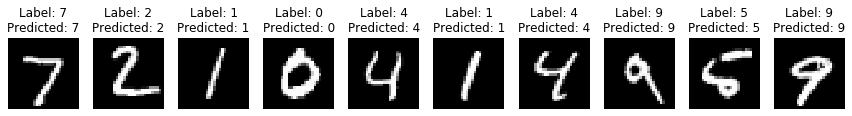

In [21]:
preds = model.predict(X_test)
n = 10
plt.figure(figsize=(15,15))
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Label: {}\nPredicted: {}".format(np.argmax(y_test[i]), np.argmax(preds[i])))
    plt.axis('off')
plt.show()          

## Plotting misclassified images:

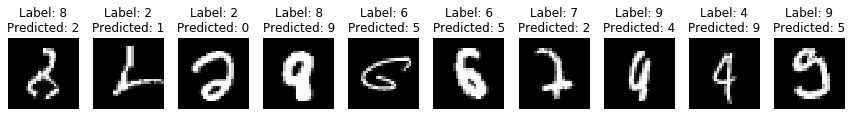

In [22]:
plt.figure(figsize=(15,15))
misc = 0
for i in range(len(y_test)):
    if(misc==10):
        break
    label = np.argmax(y_test[i])
    pred = np.argmax(preds[i])
    if label != pred:
        plt.subplot(1, n, misc + 1)
        plt.imshow(X_test[i, :, :, 0], cmap='gray')
        plt.title("Label: {}\nPredicted: {}".format(label, pred))
        plt.axis('off')
        misc+=1
plt.show()        

## Reference:

https://keras.io/datasets/